In [1]:
%matplotlib inline
import os, sys, pdb
import matplotlib.pyplot as plt

sys.path.insert(0, './core/')
plt.rcParams['figure.figsize'] = [10, 2]

testing = False

In [2]:
def visualize_imgs(img_array, rows = 2, cols = 8, selected = None, label_array = None):
    if DOWN_SAMPLE:
        process = lambda x:x.reshape(14,14)
    else:
        process = lambda x:x.reshape(28,28)
    if selected is None:
        assert(img_array.shape[0] >= rows * cols)
        selected = np.random.choice(img_array.shape[0], rows * cols, replace = False)
    else:
        assert(selected.size >= rows * cols)
    
    labels = []
    k = 1
    fid = plt.figure()
    for i in range(rows):
        for j in range(cols):
            plt.subplot(rows, cols, k)
            plt.imshow(process(img_array[selected[k-1]]), cmap='gray' )
            if label_array is not None:
                labels.append(label_array[selected[k-1]])
            k += 1
            plt.axis('off')
    if len(labels):
        print(labels)
    plt.show()

/home/leondong/proj/robust/./core/loader.py:103: UserWarning: Not enough images for class 4, will load 47 images.
  warnings.warn(f'Not enough images for class {label}, will load {n_img} images.')
/home/leondong/proj/robust/./core/loader.py:103: UserWarning: Not enough images for class 7, will load 48 images.
  warnings.warn(f'Not enough images for class {label}, will load {n_img} images.')
/home/leondong/proj/robust/./core/loader.py:103: UserWarning: Not enough images for class 8, will load 32 images.
  warnings.warn(f'Not enough images for class {label}, will load {n_img} images.')
/home/leondong/proj/robust/./core/loader.py:103: UserWarning: Not enough images for class 9, will load 34 images.
  warnings.warn(f'Not enough images for class {label}, will load {n_img} images.')


The number of samples in mnist train is 96000
Pixel value range is from 0.0 to 1.0.
[9, 2, 3, 5, 5, 5, 0, 0, 6, 3, 6, 6, 1, 7, 6, 3]


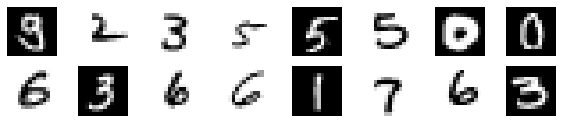

The number of samples in mnist test is 20000
Pixel value range is from 0.0 to 1.0.
[6, 0, 0, 7, 2, 1, 9, 4, 7, 2, 1, 2, 9, 6, 6, 6]


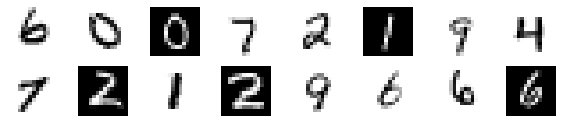

The number of samples in mnist val is 24000
Pixel value range is from 0.0 to 1.0.
[5, 9, 8, 3, 7, 9, 2, 2, 1, 8, 0, 9, 4, 1, 2, 2]


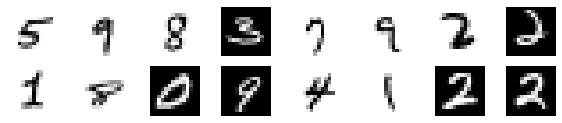

The number of samples in mnist adv_gaussain is 20000
Pixel value range is from 0.0 to 1.0.
[8, 8, 0, 6, 3, 3, 7, 4, 4, 0, 5, 4, 4, 9, 5, 1]


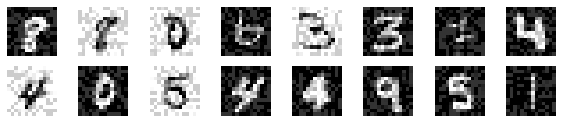

The number of samples in mnist adv_pixel is 20000
Pixel value range is from 0.0 to 1.0.
[5, 4, 9, 8, 5, 5, 0, 7, 1, 6, 3, 0, 5, 2, 9, 7]


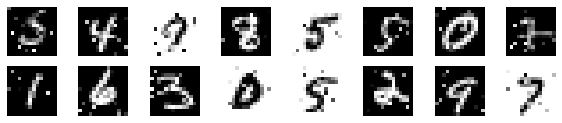

The number of samples in dida all is 10000
Pixel value range is from 0.0003431372460909188 to 0.9967058897018433.
[8, 1, 8, 4, 4, 6, 7, 4, 4, 4, 4, 3, 1, 0, 5, 0]


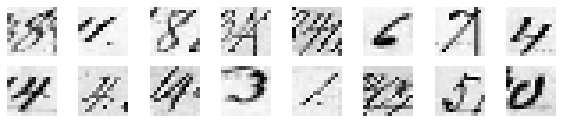

The number of samples in dida train is 5000
Pixel value range is from 0.0008235294371843338 to 0.9967058897018433.
[0, 2, 8, 9, 5, 2, 7, 9, 8, 0, 4, 8, 0, 0, 1, 2]


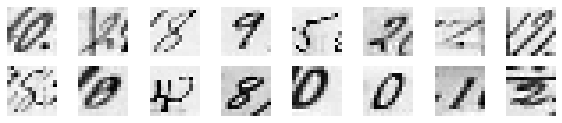

The number of samples in dida test is 5000
Pixel value range is from 0.0003431372460909188 to 0.9956946969032288.
[6, 8, 2, 3, 4, 9, 9, 9, 9, 7, 7, 6, 8, 3, 0, 7]


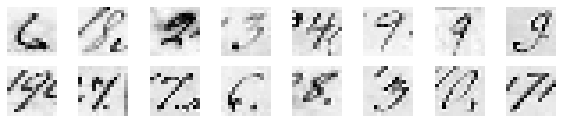

The number of samples in ch74 all is 461
Pixel value range is from 0.011791917495429516 to 1.0.
[5, 6, 5, 7, 5, 7, 9, 9, 6, 5, 4, 6, 7, 1, 8, 6]


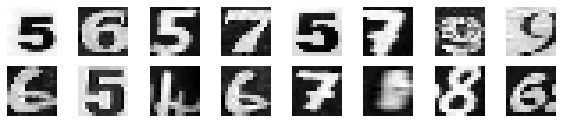

The number of samples in ch74 train is 230
Pixel value range is from 0.011791917495429516 to 1.0.
[6, 0, 6, 0, 5, 8, 5, 7, 1, 5, 8, 3, 4, 1, 4, 3]


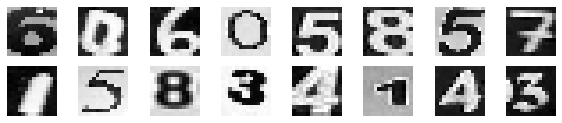

The number of samples in ch74 test is 231
Pixel value range is from 0.012752301059663296 to 1.0.
[0, 8, 9, 6, 1, 3, 2, 6, 6, 7, 6, 3, 7, 3, 5, 4]


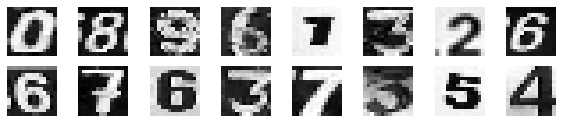

In [3]:
# load all digits datasets
import numpy as np
import loader
from functools import partial
from copy import deepcopy
from collections import defaultdict

mnist_dir = './data/digits/mnist'
ch74_dir = './data/digits/chars74k'
dida_dir = './data/digits/dida'
NUM_PER_CLASS = 50
DOWN_SAMPLE = True

# fix seed for fixed split 
np.random.seed(3)

# load all dataset and convert into certain format
(mnist_train, mnist_train_label), (mnist_test, mnist_test_label) = loader.read_mnist(mnist_dir, \
                                                                     down_sample = DOWN_SAMPLE, with_label = True)

ch74 = loader.read_chars74k(ch74_dir, NUM_PER_CLASS, with_label = True)
ch74_imgs, ch74_labels = list(zip(*ch74))
ch74 = np.array(list(map(partial(loader.transform_to_mnist, down_sample = DOWN_SAMPLE, normalize = False) ,ch74_imgs)))
ch74_labels = np.array(ch74_labels, dtype = 'i4')

dida = loader.read_dida(dida_dir, 1000, with_label = True)
dida_imgs, dida_labels = list(zip(*dida))
dida = np.array(list(map(partial(loader.transform_to_mnist, down_sample = DOWN_SAMPLE, normalize = True) ,dida_imgs)))
dida_labels = np.array(dida_labels, dtype = 'i4')

# augment mnist dataset for both black and white background
mnist_train = np.vstack([mnist_train, 1-mnist_train])
mnist_test =  np.vstack([mnist_test, 1-mnist_test])
mnist_train_label = np.hstack([mnist_train_label, mnist_train_label])
mnist_test_label = np.hstack([mnist_test_label, mnist_test_label])

# gather all dataset together in one dictionary
all_datasets = defaultdict(dict)
all_datasets['mnist']['train'] = (mnist_train, mnist_train_label)
all_datasets['mnist']['test'] = (mnist_test, mnist_test_label)
all_datasets['dida']['all'] = (dida, dida_labels)
all_datasets['ch74']['all'] = (ch74, ch74_labels)

# shuffle all datasets along with its label
for ds_name in all_datasets:
    current_splits = list(all_datasets[ds_name].keys())
    for split in current_splits:
        data, label = all_datasets[ds_name][split]
        label = label.astype('i8')
        inds = np.arange(data.shape[0])
        np.random.shuffle(inds)
        all_datasets[ds_name][split] = (data[inds], label[inds])
        
        if split == 'train':
            # split into train and val
            train_ratio = 0.8
            names = ['train', 'val']
        elif split == 'all':
            # split into train and test for dida and ch74
            train_ratio = 0.5
            names = ['train', 'test']
        else:
            train_ratio = 0
        
        if train_ratio == 0:
            continue
        
        data, label = all_datasets[ds_name][split]
        size = int(data.shape[0] * train_ratio)
        na,nb = names
        all_datasets[ds_name][na] = (data[:size], label[:size])
        all_datasets[ds_name][nb] = (data[size:], label[size:])


# do some jittering to the pixels of mnist_test
mnist_adv_gaussain = deepcopy(all_datasets['mnist']['test'][0])
mnist_adv_gaussain += np.clip(np.random.normal(size = mnist_adv_gaussain.shape, scale = 0.5), -0.2, 0.2)
mnist_adv_gaussain = np.clip(mnist_adv_gaussain, 0, 1)
all_datasets['mnist']['adv_gaussain'] = (mnist_adv_gaussain, all_datasets['mnist']['test'][1] )

n_jitter_pixel = 10
mnist_adv_pixel =  deepcopy(all_datasets['mnist']['test'][0])
for item in mnist_adv_pixel:
    selected = np.random.choice(item.size, size = n_jitter_pixel, replace = False)
    item[selected] = np.random.uniform( size = selected.size )
all_datasets['mnist']['adv_pixel'] = (mnist_adv_pixel, all_datasets['mnist']['test'][1] )

# visulize the datasets
for ds_name in all_datasets:
    for split in all_datasets[ds_name]:
        dataset, labels = all_datasets[ds_name][split]
        assert(dataset.shape[0] == labels.size)
        print('The number of samples in {} is {}'.format(f'{ds_name} {split}' ,dataset.shape[0]))
        assert(np.all(0 <= dataset) and np.all(dataset <= 1))
        print(f"Pixel value range is from {np.min(dataset)} to {np.max(dataset)}.")
        visualize_imgs(dataset, label_array = labels)
        
        # reduce size if testing 
        if testing:
            all_datasets[ds_name][split] = (dataset[:1000], labels[:1000])


In [4]:
import torch 
import torch.nn as nn

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        layers = []
        layers.append( nn.Conv2d(1, 8, kernel_size=5, stride=1, padding=2 ) )
        layers.append( nn.ReLU() )
        layers.append( nn.AvgPool2d(2, stride=2) )
        
        layers.append( nn.Conv2d(8, 64, kernel_size=5, stride=1, padding=2 ) )
        layers.append( nn.ReLU() )
        layers.append( nn.AvgPool2d(2, stride=2) )
        
        layers.append( nn.Flatten() )
        layers.append( nn.Linear(576, 128) )
        layers.append( nn.ReLU() )
        layers.append( nn.Linear(128, 128) )
        layers.append( nn.ReLU() )
        layers.append( nn.Linear(128, 64) )
        layers.append( nn.ReLU() )
        layers.append( nn.Linear(64, 10) )
        self.layers = nn.Sequential(*layers)

    def forward(self, X):
        return self.layers(X)
    

mnist_train = deepcopy(all_datasets['mnist']['train'][0])
augment_type = np.random.randint(3, size = (mnist_train.shape[0], ))

for i,v in enumerate(augment_type):
    item = mnist_train[i]
    if v == 1:
        # do gaussian augment 
        item += np.clip(np.random.normal(size = item.shape, scale = 0.5), -0.2, 0.2)
        mnist_train[i] = np.clip(item, 0, 1)
    elif v == 2:
        # do jitter augment
        selected = np.random.choice(item.size, size = n_jitter_pixel, replace = False)
        item[selected] = np.random.uniform( size = selected.size )
        mnist_train[i] = item

visualize_imgs(mnist_train, 2, 8)

In [6]:
batch_size = 1000
total_epoch = 250

# ch74_aug = np.vstack([all_datasets['ch74']['train'][0]] * 5)
# ch74_aug_label = np.hstack([all_datasets['ch74']['train'][1]] * 5)


# full_train = np.vstack([mnist_train, all_datasets['dida']['train'][0], ch74_aug])
# full_train_label = np.hstack([all_datasets['mnist']['train'][1], all_datasets['dida']['train'][1], \
#                               ch74_aug_label])

full_train = all_datasets['mnist']['train'][0]
full_train_label = all_datasets['mnist']['train'][1]

full_train = full_train.reshape(-1, 1, 14, 14)
print(full_train.shape, full_train_label.shape)
train_loader = torch.utils.data.DataLoader(list(zip(full_train, full_train_label)), batch_size=batch_size, \
                                           shuffle=True, drop_last=True)

(96000, 1, 14, 14) (96000,)


In [7]:
device = 'cuda:0'
model = LeNet5()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr= 1e-2, anneal_strategy='cos', pct_start =0.25, \
                            epochs = total_epoch, steps_per_epoch = 1, verbose = False)
model.to(device)

LeNet5(
  (layers): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(8, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=576, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=64, bias=True)
    (12): ReLU()
    (13): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [8]:
model.train()

for e in range(total_epoch):
    cur_loss = 0
    for X,y in train_loader:
        X = X.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        out = model(X)
        loss = loss_func(out, y)
        loss.backward()
        optimizer.step()
        cur_loss += loss.item()
    scheduler.step()
    print('Epoch {}, loss:{}'.format(e, cur_loss) ,end = '\r')

model.eval()

LeNet5(
  (layers): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(8, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=576, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=64, bias=True)
    (12): ReLU()
    (13): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [9]:
# do some evaluation
def evaluate(model, img_arr, label_arr):
    imgs = img_arr.reshape(-1, 1, 14, 14)
    test = torch.from_numpy(imgs).to(device)
    test_loader = torch.utils.data.DataLoader(test, batch_size=1000, shuffle=False, drop_last=False)

    ret = []
    with torch.no_grad():
        for X in test_loader:
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)
            ret.append(predicted)
    ret = torch.cat(ret, dim = 0)
    ret = ret.cpu().numpy()
    return ret


for ds_name in all_datasets:
    for split in all_datasets[ds_name]:
        if 'adv' in split or 'test' in split:
            dataset, labels = all_datasets[ds_name][split]
            preds = evaluate(model, *all_datasets[ds_name][split])
            acc = np.sum(preds == labels) / labels.size
            print('On {} {}, accuracy is {}'.format(ds_name, split, acc))
        

from utmLib import utils
utils.pkdump(model, 'output/lenet5.pkl')

In [10]:
N_TEST = 200
for ds_name in all_datasets:
    for split in all_datasets[ds_name]:
        if not ('adv' in split or 'test' in split):
            continue

        dataset, labels = all_datasets[ds_name][split]
        name = ds_name + ' ' + split

        print('-'*100)
        print(f'Classification on {name}')
        
        np.random.seed(7)
        selected = np.random.choice(dataset.shape[0], N_TEST, replace = False)
        pred_labels = evaluate(model, dataset[selected], None)
        acc = np.sum(pred_labels == labels[selected]) / pred_labels.size
        
        print('On {} {} classification, accuracy is {}'.format(ds_name, split, acc))
        print('-' * 100)

----------------------------------------------------------------------------------------------------
Classification on mnist test
On mnist test classification, accuracy is 0.995
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Classification on mnist adv_gaussain
On mnist adv_gaussain classification, accuracy is 0.995
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Classification on mnist adv_pixel
On mnist adv_pixel classification, accuracy is 0.99
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Classification on dida test
On dida t